**Machine LearningOne Week Project**

> Nama : Abdul Rezak

> Kelas : Data Science Batch 28






In [2]:
pip install kaggle


Import Library

In [1]:
import numpy as np #NumPy adalah library yang menyediakan dukungan untuk array dan operasi matematika pada array.
import pandas as pd #Pandas adalah library yang menyediakan struktur data tingkat tinggi, seperti DataFrame, yang mempermudah manipulasi dan analisis data.

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [6]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)

Data Preparation

In [13]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [15]:
!chmod 600 ~/.kaggle/kaggle.json


In [19]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 43.6MB/s]


In [23]:
import zipfile
import os

# Set the path to the downloaded zip file
zip_file_path = '/content/titanic.zip'

# Set the directory where you want to extract the contents
extracted_dir = '/content/titanic/'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir)
print("Extracted Files:", extracted_files)



Extracted Files: ['test.csv', 'gender_submission.csv', 'train.csv']


Preprocessing data

In [35]:
# Load the CSV files into pandas DataFrames
train_data = pd.read_csv(os.path.join(extracted_dir, 'train.csv'))
test_data = pd.read_csv(os.path.join(extracted_dir, 'test.csv'))

In [27]:
# check the dataset shape
print("Number of Columns in Test data",test_data.shape[1])
print("---------------------------------------")
print("Number of Rows in Test data",test_data.shape[0])

Number of Columns in Test data 11
---------------------------------------
Number of Rows in Test data 418


In [28]:
# check the dataset shape
print("Number of Columns in Test data",train_data.shape[1])
print("---------------------------------------")
print("Number of Rows in Test data",train_data.shape[0])

Number of Columns in Test data 12
---------------------------------------
Number of Rows in Test data 891


In [36]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [37]:
print(test_data.head())
print(test_data.info())
print(test_data.describe())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

In [30]:
test_data.isnull().sum() #cek data kosong pada test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
train_data.isnull().sum() #Cek data kosong pada train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Value Processing

In [38]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)

In [39]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [40]:
train_data.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

passenger_id_df = pd.DataFrame()
passenger_id_df['PassengerId'] = test_data['PassengerId'].copy()
test_data.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Detect Outliers by Using Box Plots

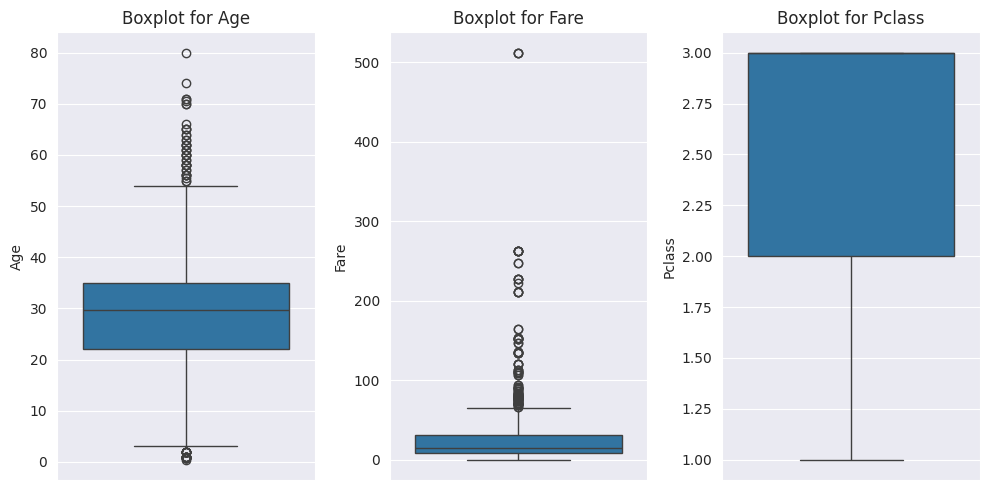

In [41]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=train_data['Age'])
plt.title('Boxplot for Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=train_data['Fare'])
plt.title('Boxplot for Fare')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_data['Pclass'])
plt.title('Boxplot for Pclass')

plt.tight_layout()
plt.show()

Detect Duplicate Lines

In [42]:
duplicate_rows = train_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
train_data = train_data.drop_duplicates()

Number of duplicate rows: 111


In [44]:
# Feature engineering
def feature_engineering(data):
    # Example: Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    # Example: Extract titles from the 'Name' column
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Drop unnecessary columns
    columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    data = data.drop(columns=columns_to_drop, axis=1)

Explotory Data Analysis


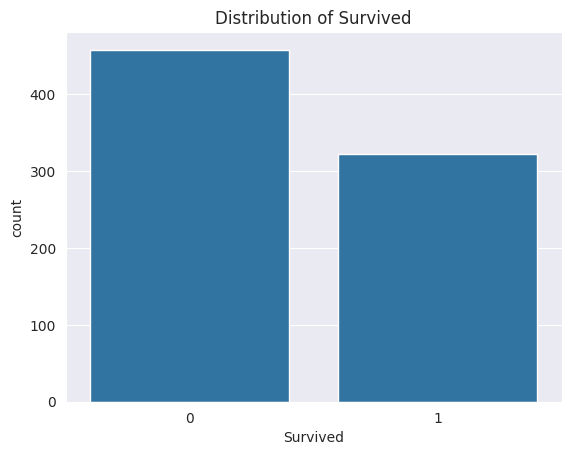

In [48]:
# Data visualization

# Visualize the distribution of 'Survived' (target variable)
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survived')
plt.show()


In [47]:
import plotly.express as px

fig = px.pie(train_data, names='Survived',
             title='Survived Distribution',
             color_discrete_sequence=px.colors.sequential.Mint_r,
             template='plotly_dark'
            )

fig.update_traces(textposition='inside',textinfo='percent+label')

fig.show()

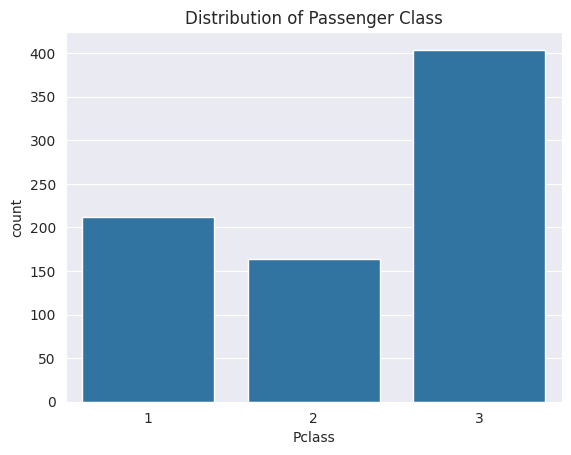

In [53]:
# Visualize the distribution of 'Pclass' (passenger class)
sns.countplot(x='Pclass', data=train_data)
plt.title('Distribution of Passenger Class')
plt.show()

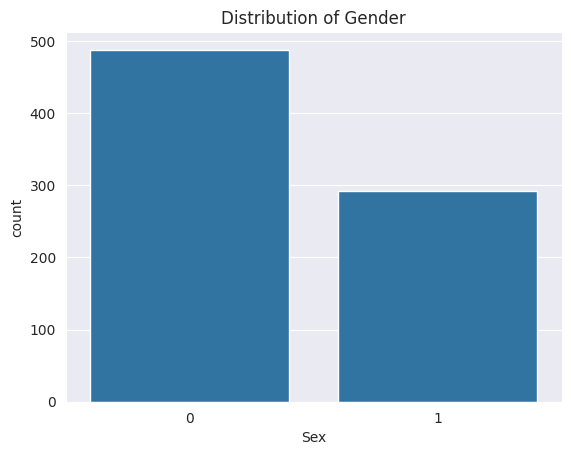

In [54]:
# Visualize the distribution of 'Sex'
sns.countplot(x='Sex', data=train_data)
plt.title('Distribution of Gender')
plt.show()

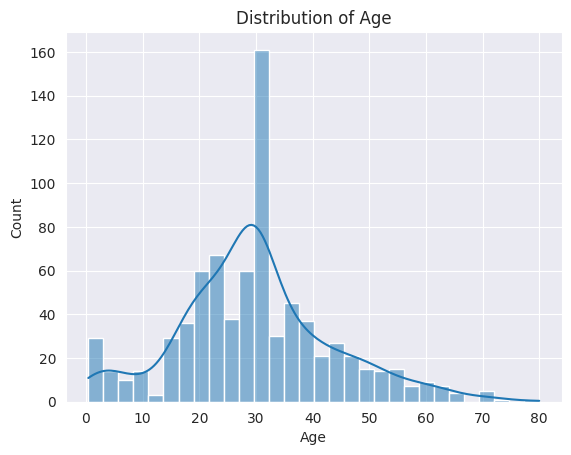

In [55]:
# Visualize the distribution of 'Age'
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()


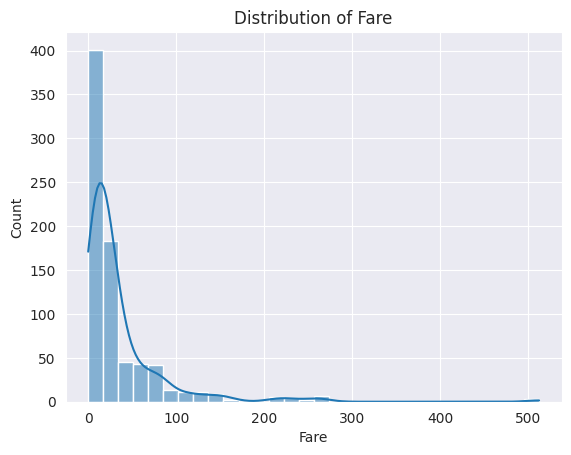

In [56]:
# Visualize the distribution of 'Fare'
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.show()

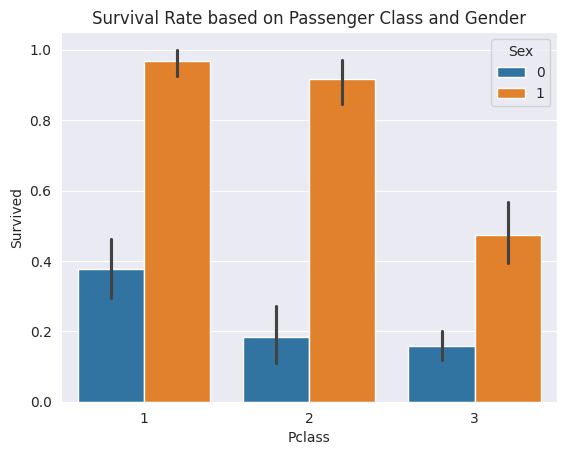

In [57]:
# Visualize the survival rate based on 'Pclass' and 'Sex'
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.title('Survival Rate based on Passenger Class and Gender')
plt.show()


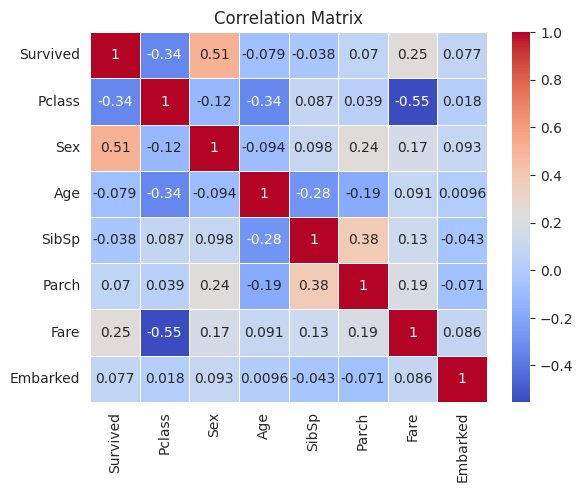

In [58]:
# Visualize the correlation matrix
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [66]:
# Sort the correlation values
sorted_corr = train_data.corr()['Survived'].sort_values(ascending=False).drop(['Survived'])

# Create a bar plot using Plotly
fig = px.bar(x=sorted_corr.index, y=sorted_corr.values, color=sorted_corr.values,
             color_continuous_scale='Viridis', labels={'x': 'Feature', 'y': 'Target'},
             title='Correlation with Target (Transported)', template='plotly_dark')

# Show the figure
fig.show()

Transformasi Data

In [59]:
# Feature selection (for simplicity, selecting a few relevant features)
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [61]:
# Define features (X) and target variable (y)
X = train_data[selected_features]
y = train_data['Survived']

In [63]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text Feature Encoding

In [68]:
# Feature encoding and standardization
from sklearn.preprocessing import OneHotEncoder, StandardScaler
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [69]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

**Modelling Random Forest**

In [71]:
# Build the pipeline with preprocessing and model
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

In [72]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [75]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}\n')



Accuracy: 0.79



In [76]:
# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        91
           1       0.77      0.71      0.74        65

    accuracy                           0.79       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156



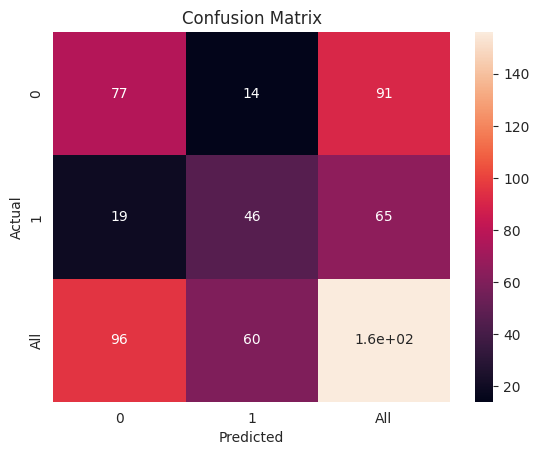

In [77]:
# Visualize the confusion matrix
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True), annot=True)
plt.title('Confusion Matrix')
plt.show()

**Modelling Machine Learning**

In [85]:
# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



In [86]:
# List of classifiers to evaluate
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter= 1500, n_jobs=-1)),
    ("KNN", KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("SVC", SVC(random_state=42, probability=True)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1))
]

In [90]:
# Creating lists for classifier names, mean_test_f1_scores, cross_val_errors, and results.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold, cross_validate

results = []
mean_test_f1_scores = []
cross_val_errors = []
classifier_names = []

for model_name, model in classifiers:

    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation with train scores
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1, return_train_score=True)

    # Calculate cross-validation error
    cross_val_error = 1 - np.mean(cv_results['test_score'])

    # Append results to the list
    results.append({
        "Model Name": model_name,
        "Mean Train F1 Score": np.mean(cv_results['train_score']),
        "Mean Test F1 Score": np.mean(cv_results['test_score']),
        "Cross-Validation Error": cross_val_error
    })


In [91]:
# Creating lists for classifier names, mean_test_f1_scores, cross_val_errors, and results.
results = []
mean_test_f1_scores = []
cross_val_errors = []
classifier_names = []

for model_name, model in classifiers:

    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation with train scores
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1, return_train_score=True)

    # Calculate cross-validation error
    cross_val_error = 1 - np.mean(cv_results['test_score'])

    # Append results to the list
    results.append({
        "Model Name": model_name,
        "Mean Train F1 Score": np.mean(cv_results['train_score']),
        "Mean Test F1 Score": np.mean(cv_results['test_score']),
        "Cross-Validation Error": cross_val_error
    })

    mean_test_f1_scores.append(np.mean(cv_results['test_score']))
    cross_val_errors.append(cross_val_error)
    classifier_names.append(model_name)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)


,Model Name,Mean Train F1 Score,Mean Test F1 Score,Cross-Validation Error
0,Logistic Regression,0.720739,0.710775,0.289225
1,KNN,0.724589,0.548110,0.451890
2,Gaussian Naive Bayes,0.704918,0.686276,0.313724
3,SVC,0.430761,0.387346,0.612654
4,Decision Tree,0.983178,0.668160,0.331840
5,Random Forest,0.983384,0.698744,0.301256
6,AdaBoost,0.785228,0.720375,0.279625
7,Gradient Boosting,0.875746,0.740826,0.259174
8,LightGBM,0.917301,0.731078,0.268922
9,XGBoost,0.976306,0.723230,0.276770


**Mean Test F1 Scores by Classifiers**

In [93]:
# Creating a DataFrame for mean test F1 score and cross-validation error
import plotly.subplots as sp
import plotly.graph_objects as go

data = pd.DataFrame({
    'Classifier': classifier_names,
    'Mean Test F1 Score': mean_test_f1_scores,
    'Cross-Validation Error': cross_val_errors
})

# Creating Plotly subplots with two columns and one row
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Mean Test F1 Scores', 'Cross-Validation Error'],
                       vertical_spacing=0.1, horizontal_spacing=0.20)

# Adding bar chart for Mean Test F1 Score
fig.add_trace(go.Bar(x=data['Mean Test F1 Score'], y=data['Classifier'], orientation='h',
                     text=data['Mean Test F1 Score'], marker=dict(color=data['Mean Test F1 Score'], colorscale='RdBu'),
                     showlegend=False),
              row=1, col=1)

# Sort the DataFrame by Cross-Validation Error in descending order
data = data.sort_values(by='Cross-Validation Error', ascending=False)

# Adding bar chart for Cross-Validation Error
fig.add_trace(go.Bar(x=data['Cross-Validation Error'], y=data['Classifier'], orientation='h',
                     text=data['Cross-Validation Error'], marker=dict(color=data['Cross-Validation Error'], colorscale='RdBu'),
                     showlegend=False),
              row=1, col=2)

# Customizing the layout
fig.update_layout(title='Model Evaluation Metrics', xaxis=dict(range=[0, 1]), yaxis=dict(categoryorder='total ascending'),
                 template='plotly_dark')

fig.show()